In [22]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

##Read in the csv file
df = pd.read_csv('DataCoSupplyChainDataset.csv')

df


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
0               91.250000          314.640015  Advance shipping   
1             -249.089996          311.359985     Late delivery   
2             -247.779999          309.720001  Shipping on time   
3               22.860001          304.809998  Advance shipping   
4              134.210007          298.250000  Advance shipping   
...                   ...                 ...               ...   
180514          40.000000          399.980011  Shipping on time   
180515        -613.770019          395.980011     Late delivery   
180516         141.110001          391.980011     Late delivery   
180517         186.229996          387.980011  Advance shipping   
180518         168.949997          383.980011  Shipping on time   

        Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                        0           73  Sporting Goods        Caguas  ...   
1                        1           73  Sporting Goods        Caguas  ...   
2                        0           73  Sporting Goods      San Jose  ...   
3                        0           73  Sporting Goods   Los Angeles  ...   
4                        0           73  Sporting Goods        Caguas  ...   
...                    ...          ...             ...           ...  ...   
180514                   0           45         Fishing      Brooklyn  ...   
180515                   1           45         Fishing   Bakersfield  ...   
180516                   1           45         Fishing       Bristol  ...   
180517                   0           45         Fishing        Caguas  ...   
180518                   0           45         Fishing        Caguas  ...   

       Order Zipcode Product Card Id Product Category Id  Product Description  \
0                NaN            1360                  73                  NaN   
1                NaN            1360                  73                  NaN   
2                NaN            1360                  73                  NaN   
3                NaN            1360                  73                  NaN   
4                NaN            1360                  73                  NaN   
...              ...             ...                 ...                  ...   
180514           NaN            1004                  45                  NaN   
180515           NaN            1004                  45                  NaN   
180516           NaN            1004                  45                  NaN   
180517           NaN            1004                  45                  NaN   
180518           NaN            1004                  45                  NaN   

                                            Product Image  \
0            http://images.acmesports.sports/Smart+watch    
1            http://images.acmesports.sports/Smart+watch    
2            http://images.acmesports.sports/Smart+watch    
3            http://images.acmesports.sports/Smart+watch    
4            http://images.acmesports.sports/Smart+watch    
...   

In [24]:
##We are only focusing on the US
USData = df[df['Customer Country'] == 'EE. UU.']


##We want to drop any NA values
USData.dropna(axis = 0,inplace = False)

##Reseting the index is neccesary to make the table more clean
USData_clean = USData.reset_index(drop=True)

##Creating Date Time to extract year
USData_clean['shipping date (DateOrders)'] = pd.to_datetime(USData_clean['shipping date (DateOrders)'])

USData_clean['year'] = USData_clean['shipping date (DateOrders)'].dt.year

##Selecting what we want to be show in our data frame, these values matter to us for our visualization
USDEL_DF = USData_clean[['Customer Country','Days for shipment (scheduled)','Days for shipping (real)','Delivery Status','year']]
print(USDEL_DF)

##This creates a new CSV with our new table
USDEL_DF.to_csv('USDEL_DF.csv', index=True)

       Customer Country  Days for shipment (scheduled)  \
0               EE. UU.                              4   
1               EE. UU.                              4   
2               EE. UU.                              4   
3               EE. UU.                              1   
4               EE. UU.                              1   
...                 ...                            ...   
111141          EE. UU.                              2   
111142          EE. UU.                              4   
111143          EE. UU.                              4   
111144          EE. UU.                              2   
111145          EE. UU.                              4   

        Days for shipping (real)    Delivery Status  year  
0                              4   Shipping on time  2018  
1                              3   Advance shipping  2018  
2                              6  Shipping canceled  2018  
3                              2      Late delivery  2018  
4  

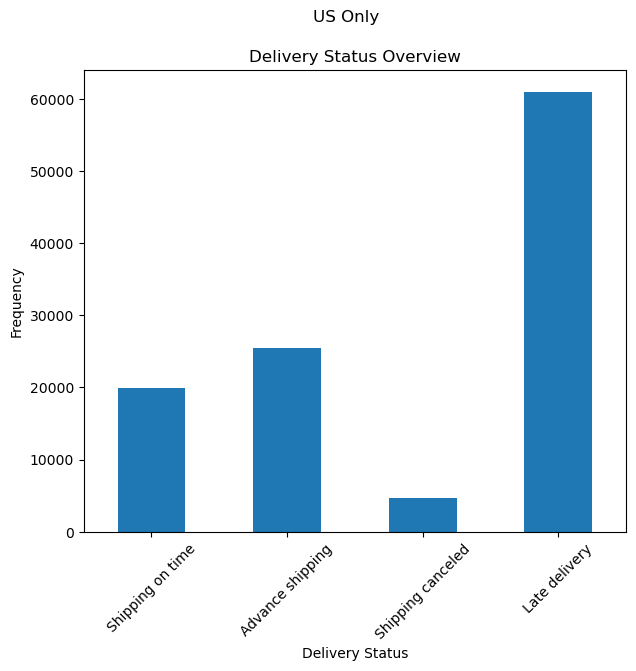

In [50]:
count = USDEL_DF['Delivery Status'].value_counts(sort = False)

fig = plt.figure(figsize = (7,6))
ax = count.plot.bar()
plt.title('Delivery Status Overview')
plt.suptitle('US Only')
plt.xlabel("Delivery Status")
plt.xticks(rotation=45)
plt.ylabel("Frequency")

plt.show()

In [56]:
##Taking all the columns neccesary for the heatmap frequency
USHEAT_DF = USData_clean[['Customer Country','Customer State','Longitude','Latitude']]

print(USHEAT_DF)

##Creating a new CSV file with these values
USHEAT_DF.to_csv('USHEAT_DF.csv', index=True)

       Customer Country Customer State   Longitude   Latitude
0               EE. UU.             CA -121.881279  37.292233
1               EE. UU.             CA -118.291016  34.125946
2               EE. UU.             NY  -78.879066  43.013969
3               EE. UU.             FL  -80.162872  25.928869
4               EE. UU.             CA -121.966629  37.773991
...                 ...            ...         ...        ...
111141          EE. UU.             CA -117.073662  32.611141
111142          EE. UU.             OH  -82.599297  39.715977
111143          EE. UU.             NY  -73.942711  40.640930
111144          EE. UU.             CA -119.018700  35.362545
111145          EE. UU.             CT  -72.967155  41.629959

[111146 rows x 4 columns]


In [59]:
USDEL_DF.describe()

Days for shipment (scheduled)  Days for shipping (real)
count                  111146.000000             111146.000000
mean                        2.926412                  3.494017
std                         1.377320                  1.625028
min                         0.000000                  0.000000
25%                         2.000000                  2.000000
50%                         4.000000                  3.000000
75%                         4.000000                  5.000000
max                         4.000000                  6.000000

In [27]:
USData_clean['month'] = USData_clean['shipping date (DateOrders)'].dt.month

USPROD_DF = USData_clean[['Customer Country','Category Name','month','year']]

USPROD_DF.to_csv('USPROD_DF.csv', index=True)

USPROD_DF

Customer Country   Category Name  month  year
0               EE. UU.  Sporting Goods      1  2018
1               EE. UU.  Sporting Goods      1  2018
2               EE. UU.  Sporting Goods      1  2018
3               EE. UU.  Sporting Goods      1  2018
4               EE. UU.  Sporting Goods      1  2018
...                 ...             ...    ...   ...
111141          EE. UU.         Fishing      1  2016
111142          EE. UU.         Fishing      1  2016
111143          EE. UU.         Fishing      1  2016
111144          EE. UU.         Fishing      1  2016
111145          EE. UU.         Fishing      1  2016

[111146 rows x 4 columns]